# Task Definition

* 주어진 데이터를 갖고 네트워크 칩입을 감지하는 Classfication Model을 설계하라.

* 주어진 데이터를 가공하고, 수정하여도 무관하다.

* 사용해 볼 수 있는 만큼 많은 모델을 시도하여 볼 것

* 사용한 모델은 모두 Jupyter Notebook에 남길 것 (채점할 때 실행 가능하도록)

* 보고서는 따로 워드로 제출할 것 (보고서 양식은 따로 없음)

# Data Description

해당 데이터는 KDD Cup 1999 Dataset을 가공한 네트워크 칩입 감지 시스템용 데이터이다. 각 Feature들은 어떤 protocol type을 사용하는 지 혹은 어떤 service를 사용하는 지 등의 내용를 담고 있다. Class는 현재 네트워크가 침입을 당한 상태인 지 만약 침입을 당하였다면 어떤 종류의 침입을 당했는 지를 나타낸다.

# Feature Description

## Total 41 Features.

duration: continuous.

protocol_type: symbolic.

service: Numeric, categorical

flag: Numeric, categorical

src_bytes: continuous.

dst_bytes: continuous.

land: symbolic.

wrong_fragment: continuous.

urgent: continuous.

hot: continuous.

num_failed_logins: continuous.

logged_in: symbolic.

num_compromised: continuous.

root_shell: continuous.

su_attempted: continuous.

num_root: continuous.

num_file_creations: continuous.

num_shells: continuous.

num_access_files: continuous.

num_outbound_cmds: continuous.

is_host_login: symbolic.

is_guest_login: symbolic.

count: continuous.

srv_count: continuous.

serror_rate: continuous.

srv_serror_rate: continuous.

rerror_rate: continuous.

srv_rerror_rate: continuous.

same_srv_rate: continuous.

diff_srv_rate: continuous.

srv_diff_host_rate: continuous.

dst_host_count: continuous.

dst_host_srv_count: continuous.

dst_host_same_srv_rate: continuous.

dst_host_diff_srv_rate: continuous.

dst_host_same_src_port_rate: continuous.

dst_host_srv_diff_host_rate: continuous.

dst_host_serror_rate: continuous.

dst_host_srv_serror_rate: continuous.

dst_host_rerror_rate: continuous.

dst_host_srv_rerror_rate: continuous.

보다 자세한 설명은 http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html 를 참조(가공된 데이터이기 때문에, 사이트와 다른 점이 있음을 염두할것.)

# Class Description

"Normal", "dos", "u2r", "r2l", "probe" 5개의 Class가 존재한다.

Normal은 정상을 의미하며, 나머지 4개는 네트워크상 침입 기법들의 이름들이다.

# Pandas로 데이터 불러오기

In [52]:
import pandas as pd
import numpy as np
import time
from sklearn_evaluation import plot
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import neighbors
kf = KFold(10)

In [2]:
data = pd.read_csv('train_data.csv')

In [3]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


# Decision Tree

In [4]:
from sklearn import tree

In [5]:
import seaborn as sns

In [6]:
def protocol_type_to_int(protocol):
    if protocol=='icmp':
        return 0
    if protocol=='tcp':
        return 1
    if protocol=='udp':
        return 2

In [7]:
def attack_to_int(attack):
    if attack=='normal':
        return 0
    if attack=='u2r':
        return 1
    if attack=='r2l':
        return 2
    if attack=='dos':
        return 3
    if attack=='probe':
        return 4

In [8]:
data['protocol_type'] = data['protocol_type'].apply(protocol_type_to_int)
#data['xAttack'] = data['xAttack'].apply(attack_to_int)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
decision_tree = tree.DecisionTreeClassifier()

In [9]:
decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn_evaluation import plot

In [10]:
test = pd.read_csv('train_data.csv')

In [11]:
test['protocol_type'] = test['protocol_type'].apply(protocol_type_to_int)
#test['xAttack'] = test['xAttack'].apply(attack_to_int)

In [13]:
decision_tree.predict(test.iloc[:,:-1])

array(['normal', 'normal', 'dos', ..., 'normal', 'dos', 'normal'], dtype=object)

10-fold cross validation

In [14]:
start_time = time.time()
decision_tree_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = decision_tree.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        decision_tree_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.997856802667
0.997142403556
0.997063025877
0.998253552433
0.998094784472
0.998094784472
0.997618480591
0.998253552433
0.997697864571
0.998015400492
--- 11.748276233673096 seconds ---


# Decision Tree Evaluation

In [50]:
start_time = time.time()
print(decision_tree_max.score(test.iloc[:,:-1], test.iloc[:,-1]))
print("--- %s seconds ---" % (time.time() - start_time))

0.999753915522
--- 0.3012239933013916 seconds ---


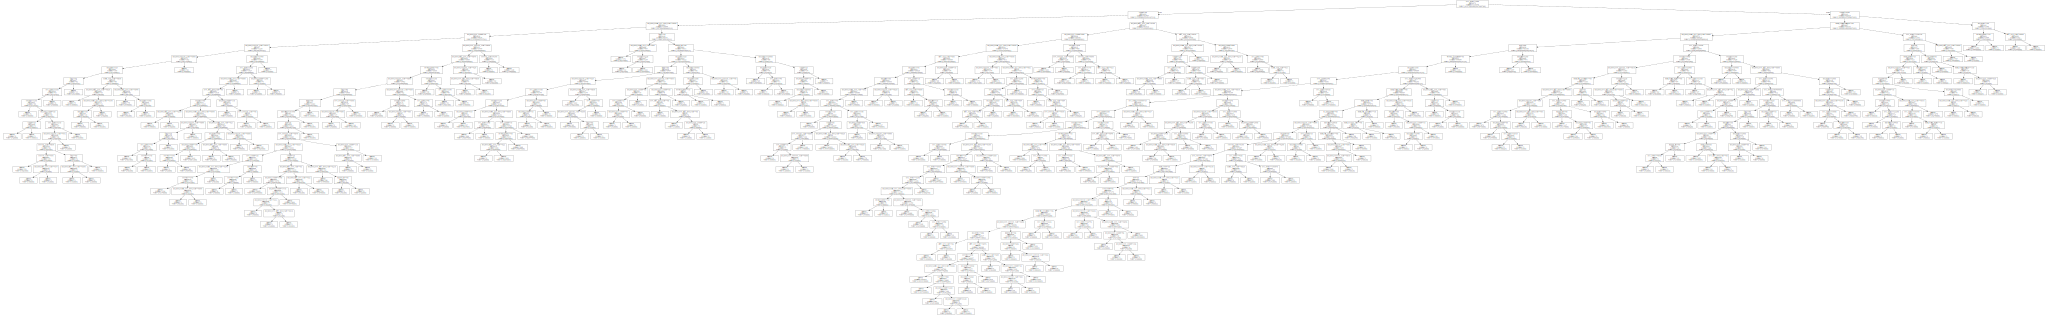

In [17]:
from graphviz import Source
Source(tree.export_graphviz(decision_tree_max, out_file=None, feature_names=X.columns))

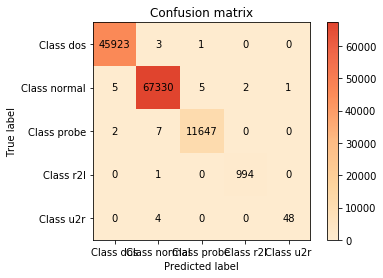

In [18]:
plot.confusion_matrix(test.iloc[:,-1], decision_tree_max.predict(test.iloc[:,:-1]))

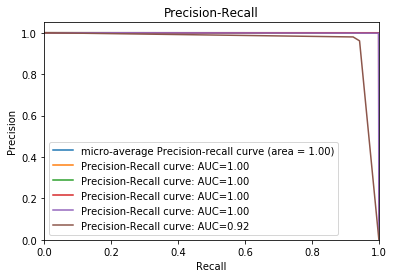

In [19]:
plot.precision_recall(test.iloc[:,-1], decision_tree_max.predict_proba(test.iloc[:,:-1]))

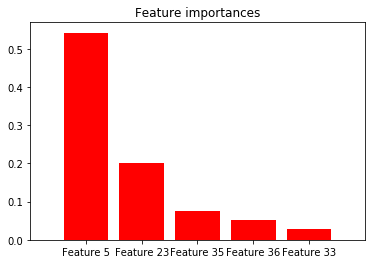

In [20]:
plot.feature_importances(decision_tree_max, top_n=5)

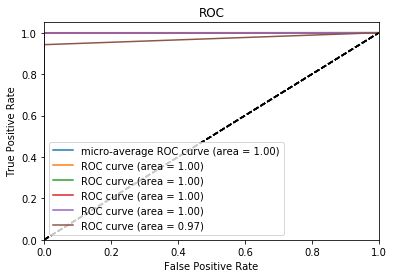

In [21]:
plot.roc(test.iloc[:,-1], decision_tree_max.predict_proba(test.iloc[:,:-1]))

In [22]:
from sklearn.model_selection import learning_curve, validation_curve

In [23]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree_max, test.iloc[:,:-1], test.iloc[:,-1])

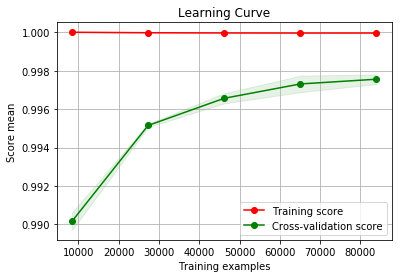

In [24]:
plot.learning_curve(train_scores, test_scores, train_sizes)

# Naive Bayes

In [27]:
from sklearn import naive_bayes

nv = naive_bayes.MultinomialNB()

start_time = time.time()
nv_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = nv.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        nv_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.422924273694
0.414827750437
0.415621527227
0.421132015559
0.421132015559
0.41875049615
0.42129078352
0.412002857823
0.434389140271
0.409541954434
--- 6.129004716873169 seconds ---


In [28]:
start_time = time.time()
print(nv_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.409541954434
--- 0.025083303451538086 seconds ---


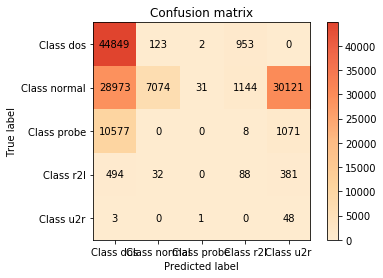

In [29]:
plot.confusion_matrix(test.iloc[:,-1], nv_max.predict(test.iloc[:,:-1]))

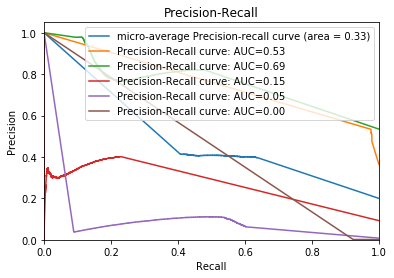

In [30]:
plot.precision_recall(test.iloc[:,-1], nv_max.predict_proba(test.iloc[:,:-1]))

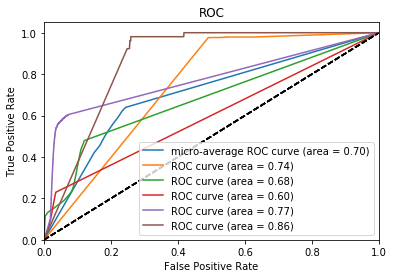

In [31]:
plot.roc(test.iloc[:,-1], nv_max.predict_proba(test.iloc[:,:-1]))

# Multi Layered Perceptron - default(layer size = 100)

In [27]:
from sklearn import neural_network

mlp = neural_network.MLPClassifier()

start_time = time.time()
mlp_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = mlp.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        mlp_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.951658993491
0.925146848706
0.961660581045
0.909343494483
0.939826942923
0.953242835596
0.962530761292
0.954909899182
0.969834087481
0.950067476383
--- 93.99259996414185 seconds ---


In [52]:
start_time = time.time()
print(mlp_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.950067476383
--- 0.05383634567260742 seconds ---


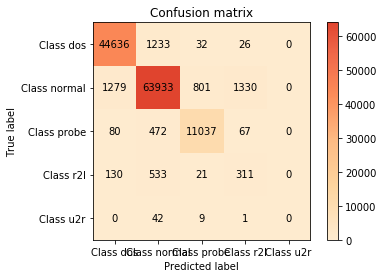

In [29]:
plot.confusion_matrix(test.iloc[:,-1], mlp_max.predict(test.iloc[:,:-1]))

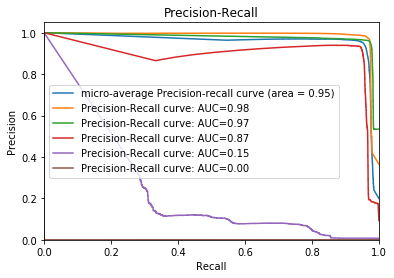

In [30]:
plot.precision_recall(test.iloc[:,-1], mlp_max.predict_proba(test.iloc[:,:-1]))

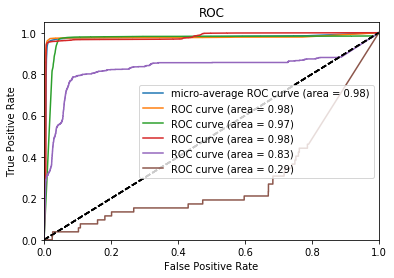

In [49]:
plot.roc(test.iloc[:,-1], mlp_max.predict_proba(test.iloc[:,:-1]))

# Multi Layered Perceptron - layer size = 5, 5

In [17]:
from sklearn import neural_network

mlp = neural_network.MLPClassifier(hidden_layer_sizes = (5,5))

start_time = time.time()
mlp_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = mlp.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        mlp_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.944991268455
0.911335132561
0.842673440229
0.911725013892
0.574263713583
0.90354846392
0.88568706835
0.880527109629
0.744859887275
0.779630070652
--- 80.10169315338135 seconds ---


In [18]:
start_time = time.time()
print(mlp_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.779630070652
--- 0.03156399726867676 seconds ---


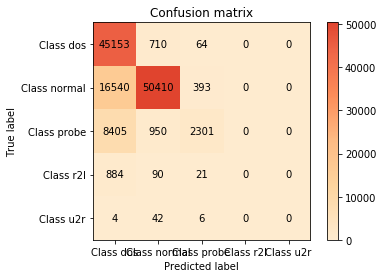

In [19]:
plot.confusion_matrix(test.iloc[:,-1], mlp_max.predict(test.iloc[:,:-1]))

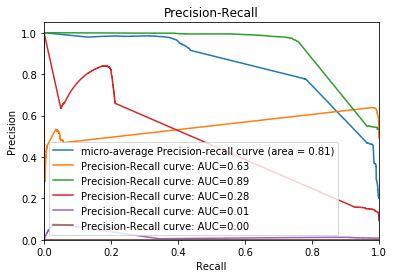

In [20]:
plot.precision_recall(test.iloc[:,-1], mlp_max.predict_proba(test.iloc[:,:-1]))

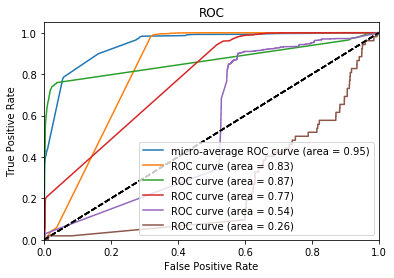

In [21]:
plot.roc(test.iloc[:,-1], mlp_max.predict_proba(test.iloc[:,:-1]))

# Multi Layered Perceptron - layer size = 10

In [22]:
from sklearn import neural_network

mlp = neural_network.MLPClassifier(hidden_layer_sizes = 10)

start_time = time.time()
mlp_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = mlp.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        mlp_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.908477536117
0.908160025401
0.956104143515
0.79693577836
0.918472652219
0.823926331666
0.951417004049
0.95419544336
0.932285464793
0.93149162499
--- 47.2408926486969 seconds ---


In [23]:
start_time = time.time()
print(mlp_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.93149162499
--- 0.03162503242492676 seconds ---


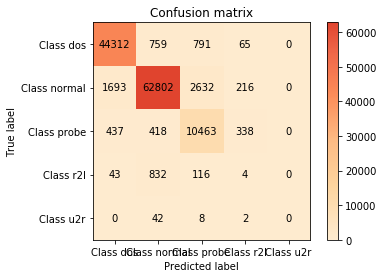

In [24]:
plot.confusion_matrix(test.iloc[:,-1], mlp_max.predict(test.iloc[:,:-1]))

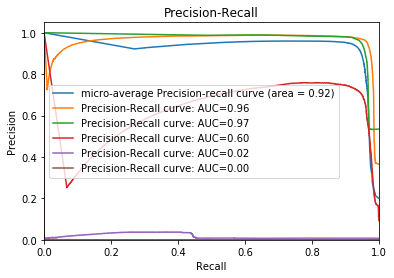

In [25]:
plot.precision_recall(test.iloc[:,-1], mlp_max.predict_proba(test.iloc[:,:-1]))

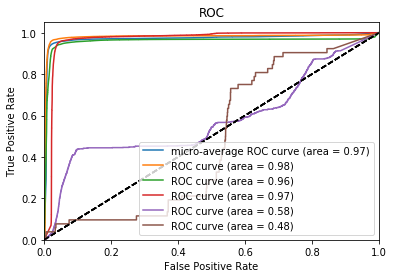

In [26]:
plot.roc(test.iloc[:,-1], mlp_max.predict_proba(test.iloc[:,:-1]))

# KNN

In [32]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

start_time = time.time()
knn_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = knn.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        knn_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.992617875853
0.992538498174
0.991585966026
0.993093593713
0.992061601969
0.992537905851
0.992776057792
0.992934825752
0.991902834008
0.994125585457
--- 84.81572151184082 seconds ---


In [53]:
start_time = time.time()
print(knn_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.994125585457
--- 2.5526957511901855 seconds ---


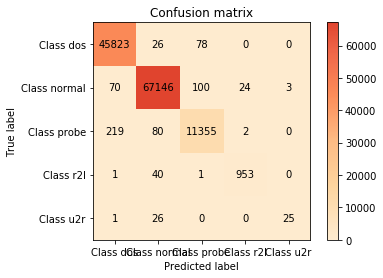

In [34]:
plot.confusion_matrix(test.iloc[:,-1], knn_max.predict(test.iloc[:,:-1]))

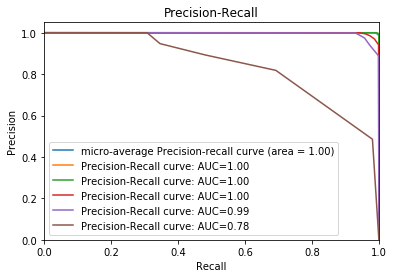

In [35]:
plot.precision_recall(test.iloc[:,-1], knn_max.predict_proba(test.iloc[:,:-1]))

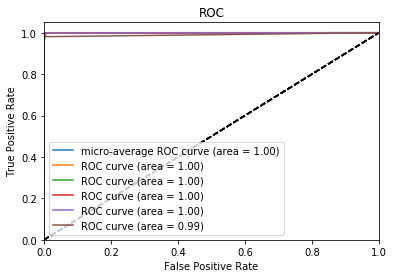

In [36]:
plot.roc(test.iloc[:,-1], knn_max.predict_proba(test.iloc[:,:-1]))

# Ensemble - Bagging

In [37]:
from sklearn import ensemble

bagging = ensemble.BaggingClassifier()

start_time = time.time()
bagging_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = bagging.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        bagging_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.998491824099
0.997777424988
0.998253691062
0.998412320394
0.997936016512
0.997777248551
0.998412320394
0.998888624276
0.997777248551
0.998253552433
--- 58.41758131980896 seconds ---


In [54]:
start_time = time.time()
print(bagging_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.998253552433
--- 0.07534432411193848 seconds ---


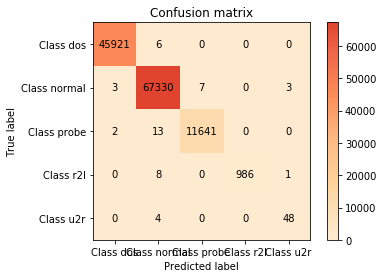

In [41]:
plot.confusion_matrix(test.iloc[:,-1], bagging_max.predict(test.iloc[:,:-1]))

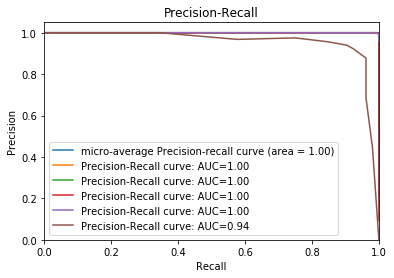

In [42]:
plot.precision_recall(test.iloc[:,-1], bagging_max.predict_proba(test.iloc[:,:-1]))

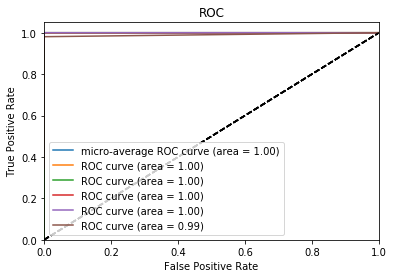

In [43]:
plot.roc(test.iloc[:,-1], bagging_max.predict_proba(test.iloc[:,:-1]))

# Ensemble - RandomForest

In [44]:
random_forest = ensemble.RandomForestClassifier()

start_time = time.time()
random_forest_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = random_forest.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        random_forest_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.998729957136
0.99841244642
0.998094935704
0.998491704374
0.998332936413
0.998253552433
0.998491704374
0.998412320394
0.998571088354
0.999047392236
--- 9.353556156158447 seconds ---


In [55]:
start_time = time.time()
print(random_forest_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.999047392236
--- 0.05884146690368652 seconds ---


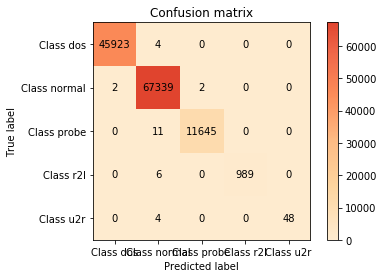

In [46]:
plot.confusion_matrix(test.iloc[:,-1], random_forest_max.predict(test.iloc[:,:-1]))

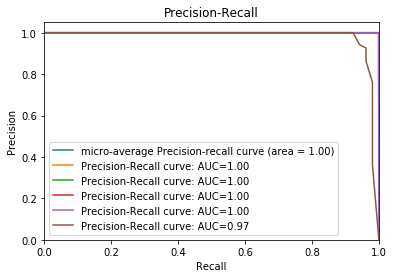

In [47]:
plot.precision_recall(test.iloc[:,-1], random_forest_max.predict_proba(test.iloc[:,:-1]))

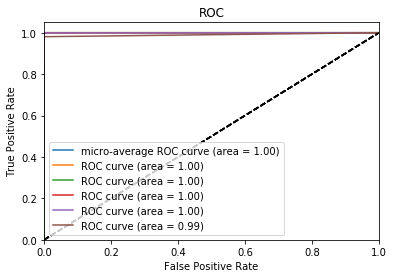

In [48]:
plot.roc(test.iloc[:,-1], random_forest_max.predict_proba(test.iloc[:,:-1]))

# Ensemble - Voting

In [58]:
decision_tree = tree.DecisionTreeClassifier()
knn = neighbors.KNeighborsClassifier()
voting = ensemble.VotingClassifier(estimators=[('dc', decision_tree), ('knn', knn)], voting='soft')

start_time = time.time()
voting_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = voting.fit(X.iloc[train_index], y.iloc[train_index], None)
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        voting_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

0.997539291951
0.996428004445
0.996666137482
0.997618480591
0.996904024768
0.99745971263
0.997300944669
0.99738032865
0.997062792728
0.99753909661
--- 103.11042046546936 seconds ---


In [59]:
start_time = time.time()
print(voting.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.99753909661
--- 2.9023489952087402 seconds ---


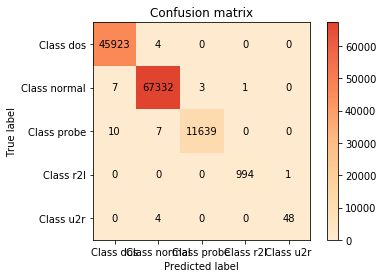

In [60]:
plot.confusion_matrix(test.iloc[:,-1], voting.predict(test.iloc[:,:-1]))

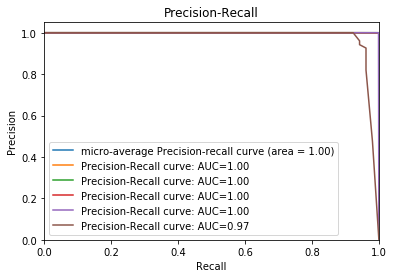

In [61]:
plot.precision_recall(test.iloc[:,-1], voting.predict_proba(test.iloc[:,:-1]))

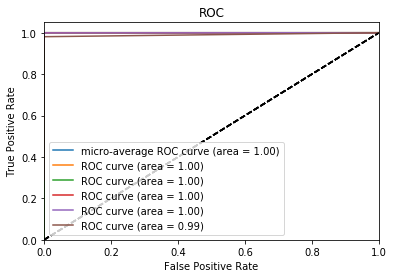

In [62]:
plot.roc(test.iloc[:,-1], voting.predict_proba(test.iloc[:,:-1]))

# SVM - iter = 500

In [18]:
from sklearn import svm
svm = svm.SVC(max_iter = 500, probability=True)

start_time = time.time()
svm_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = svm.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        svm_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.850214319733
0.866963010002
0.869741228766
0.866079225212
0.858140827181
0.729697547035
0.849170437406
0.851790108756
0.971342383107
0.856156227673
--- 2714.007992506027 seconds ---


In [19]:
start_time = time.time()
print(svm_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.856156227673
--- 2.9824531078338623 seconds ---


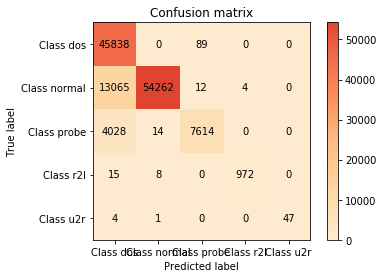

In [20]:
plot.confusion_matrix(test.iloc[:,-1], svm_max.predict(test.iloc[:,:-1]))

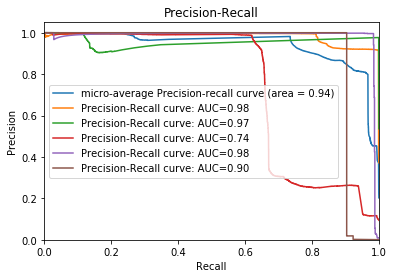

In [21]:
plot.precision_recall(test.iloc[:,-1], svm_max.predict_proba(test.iloc[:,:-1]))

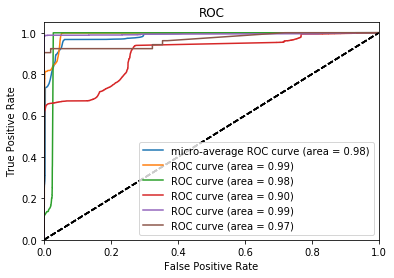

In [22]:
plot.roc(test.iloc[:,-1], svm_max.predict_proba(test.iloc[:,:-1]))

# SVM - iter = 100

In [12]:
from sklearn import svm
svm = svm.SVC(max_iter = 100, probability=True)

start_time = time.time()
svm_max = None
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    classifier = svm.fit(X.iloc[train_index], y.iloc[train_index])
    scores[i] = classifier.score(X.iloc[test_index], y.iloc[test_index])
    print(scores[i])
    if scores.max() == scores[i]:
        svm_max = classifier
print("--- %s seconds ---" % (time.time() - start_time))

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.607794888077
0.491189077631
0.525003968884
0.393188854489
0.397078669524
0.521552750655
0.373263475431
0.530840676352
0.384297848694
0.729538779074
--- 667.8013825416565 seconds ---


In [13]:
start_time = time.time()
print(svm_max.score(X.iloc[test_index], y.iloc[test_index]))
print("--- %s seconds ---" % (time.time() - start_time))

0.729538779074
--- 1.0012452602386475 seconds ---


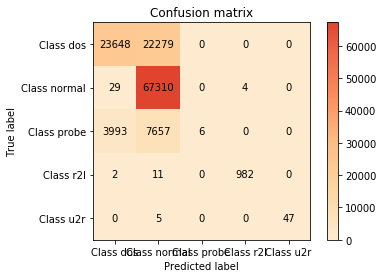

In [14]:
plot.confusion_matrix(test.iloc[:,-1], svm_max.predict(test.iloc[:,:-1]))

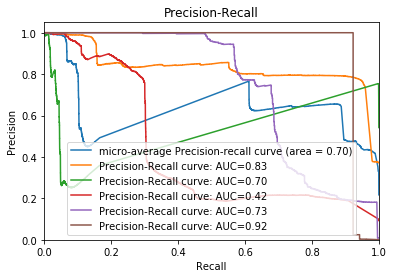

In [15]:
plot.precision_recall(test.iloc[:,-1], svm_max.predict_proba(test.iloc[:,:-1]))

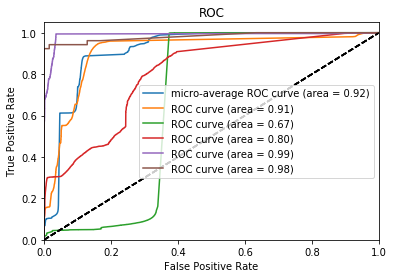

In [16]:
plot.roc(test.iloc[:,-1], svm_max.predict_proba(test.iloc[:,:-1]))

# 결과 분석


전체적으로 보았을때 Decision Tree가 정확도 면에서나 속도 면에서나 다른 모델보다 월등히 좋았다.

Decision Tree를 기반으로 하는 Ensemble 모델들도 이에 따라서 상당히 높은 성능을 보여주었다.

KNN은 높은 정확도를 보여주었는데 KNN의 특성상 predict하는 시간이 다른 모델과 비교하면 다른 모델이 0.05초대를 보여주는데 혼자서 2.5초를 잡아먹는다.

Naive Bayes 모델은 매우 빠르지만 의미가 없을 정도로 낮은 성능을 보여주었다.

MLP와 SVM같은 경우는 둘다 hidden layer 숫자나 max iter 숫자를 높이면 높은 성능을 보여주지만 그만큼 학습시키는데 걸리는 시간이 매우 길다. 특히 SVM이 max iter에 따라 학습시키는 시간의 차이가 너무 크고 max iter를 낮추자니 Naive Bayes모델 급으로 저급한 성능을 보여준다.